# TouchAudio APIs tutorial

In [1]:
import torch
import torchaudio
from IPython.display import Audio

print(torch.__version__)
print(torchaudio.__version__)

2.1.0
2.1.0


## Audio I/O

### Preparation

In [2]:
from torchaudio.utils import download_asset

SAMPLE_GSM = download_asset("tutorial-assets/steam-train-whistle-daniel_simon.gsm")
SAMPLE_WAV = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042.wav")
SAMPLE_WAV_8000 = download_asset("tutorial-assets/Lab41-SRI-VOiCES-src-sp0307-ch127535-sg0042-8000hz.wav")
# VIVOSDEV01_R002 TIẾNG CỌC CẠCH KHỰNG LẠI CỦA NHỮNG KHỚP SẮT
CUSTOM_WAV = "datasets/vivos/test/waves/VIVOSDEV01/VIVOSDEV01_R002.wav"

### Querying audio metadata

In [3]:
metadata = torchaudio.info(SAMPLE_WAV)
print(metadata)

AudioMetaData(sample_rate=16000, num_frames=54400, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [7]:
print(torchaudio.info(SAMPLE_WAV_8000))

AudioMetaData(sample_rate=8000, num_frames=27200, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [4]:
print(torchaudio.info(CUSTOM_WAV))

AudioMetaData(sample_rate=16000, num_frames=65000, num_channels=1, bits_per_sample=16, encoding=PCM_S)


- Where

`sample_rate` is the sampling rate of the audio

`num_channels` is the number of channels

`num_frames` is the number of frames per channel

`bits_per_sample` is bit depth

`encoding` is the sample coding format

- encoding can take on one of the following values:

"`PCM_S`": Signed integer linear PCM

"`PCM_U`": Unsigned integer linear PCM

"`PCM_F`": Floating point linear PCM

"`FLAC`": Flac, Free Lossless Audio Codec

"`ULAW`": Mu-law, 
"`ALAW`": A-law 

"`MP3`" : MP3, MPEG-1 Audio Layer III

"`VORBIS`": OGG Vorbis 
"`AMR_NB`": Adaptive Multi-Rate

"`AMR_WB`": Adaptive Multi-Rate Wideband 

"`OPUS`": Opus 

"`GSM`": GSM-FR 

"`HTK`": Single channel 16-bit PCM

"`UNKNOWN`" None of above

- Note

`bits_per_sample` can be 0 for formats with compression and/or variable bit rate (such as MP3).

`num_frames` can be 0 for GSM-FR format.

In [5]:
print(torchaudio.info(SAMPLE_GSM))

AudioMetaData(sample_rate=8000, num_frames=39680, num_channels=1, bits_per_sample=0, encoding=GSM)


### Loading audio data

In [6]:
waveform, sample_rate = torchaudio.load(CUSTOM_WAV)

In [11]:
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")

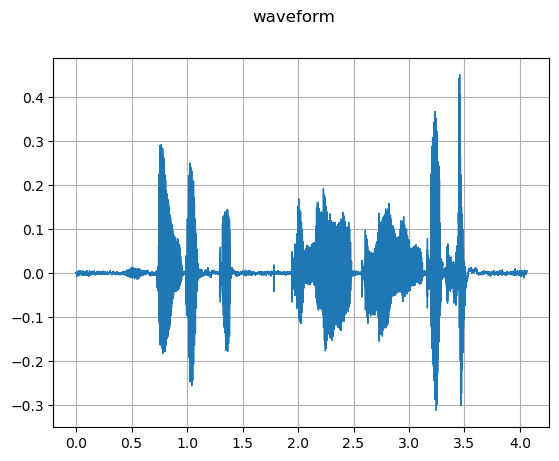

In [12]:
plot_waveform(waveform, sample_rate)

In [13]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(waveform[c], Fs=sample_rate)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle(title)


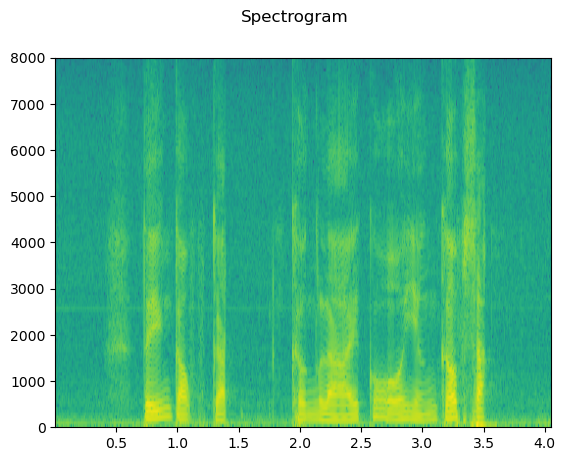

In [14]:
plot_specgram(waveform, sample_rate)

In [15]:
Audio(waveform.numpy()[0], rate=sample_rate)

### Save audio to file

In [18]:
import os
import tarfile
import tempfile

def inspect_file(path):
    print("-" * 10)
    print("Source:", path)
    print("-" * 10)
    print(f" - File size: {os.path.getsize(path)} bytes")
    print(f" - File size (MB): {os.path.getsize(path) / (1024 * 1024):.3f} MB")
    print(f" - {torchaudio.info(path)}")
    print()


In [19]:
with tempfile.TemporaryDirectory() as tempdir:
    path = os.path.join(tempdir, "test.wav")
    torchaudio.save(path, waveform, sample_rate)
    inspect_file(path)

----------
Source: /tmp/tmp3uic_t0k/test.wav
----------
 - File size: 130078 bytes
 - File size (MB): 0.124 MB
 - AudioMetaData(sample_rate=16000, num_frames=65000, num_channels=1, bits_per_sample=16, encoding=PCM_S)



In [20]:
with tempfile.TemporaryDirectory() as tempdir:
    path = f"{tempdir}/save_example_PCM_S16.wav"
    torchaudio.save(path, waveform, sample_rate, encoding="PCM_S", bits_per_sample=16)
    inspect_file(path)

----------
Source: /tmp/tmpybtg7kxg/save_example_PCM_S16.wav
----------
 - File size: 130078 bytes
 - File size (MB): 0.124 MB
 - AudioMetaData(sample_rate=16000, num_frames=65000, num_channels=1, bits_per_sample=16, encoding=PCM_S)



In [21]:
formats = [
    "flac",
    # "vorbis",
    # "sph",
    # "amb",
    # "amr-nb",
    # "gsm",
]

waveform, sample_rate = torchaudio.load(SAMPLE_WAV_8000)
with tempfile.TemporaryDirectory() as tempdir:
    for format in formats:
        path = f"{tempdir}/save_example.{format}"
        torchaudio.save(path, waveform, sample_rate, format=format)
        inspect_file(path)

----------
Source: /tmp/tmpj4h4__pr/save_example.flac
----------
 - File size: 45264 bytes
 - File size (MB): 0.043 MB
 - AudioMetaData(sample_rate=8000, num_frames=27200, num_channels=1, bits_per_sample=16, encoding=FLAC)

